In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

itau_data = pd.DataFrame()
bb_data = pd.DataFrame()

# Datas para treinamento
start_date = '2019-01-01'
end_date = '2019-12-31'

tck_itau = ['ITUB4.SA']
tck_bb = ['BBAS3.SA']

bnc_itau = yf.Ticker("ITUB4.SA")
#itau_data = bncItau.history(start=start_date, end=end_date)
itau_data = yf.download(tck_itau, start=start_date, end=end_date)


bnc_brasil = yf.Ticker("BBAS3.SA")
bb_data = yf.download(tck_bb, start=start_date, end=end_date)  # Histórico de 5 anos

itau_data.head(10)

#print(bb_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA
Date,,,,,,
2019-01-02 00:00:00+00:00,29.085899,37.000000,37.139999,35.349998,35.439999,25581700
2019-01-03 00:00:00+00:00,29.565422,37.610001,37.610001,36.450001,36.750000,21938600
2019-01-04 00:00:00+00:00,29.070156,36.980000,37.709999,36.750000,37.220001,24873500
2019-01-07 00:00:00+00:00,29.125189,37.049999,37.500000,36.750000,36.799999,16901100
2019-01-08 00:00:00+00:00,29.494671,37.520000,37.570000,36.560001,37.180000,19556300
2019-01-09 00:00:00+00:00,29.942757,38.090000,38.090000,37.580002,37.900002,20307500
2019-01-10 00:00:00+00:00,29.738363,37.830002,38.389999,37.639999,37.919998,24741800
2019-01-11 00:00:00+00:00,29.557554,37.599998,37.930000,37.299999,37.599998,13630100


In [ ]:

def calculate_rsi(data, window):
    # Delta = calcula a diferença de preço de um dia para o outro
    delta = data['Close'].diff(1)
    #diff -> calcula a diferença entre valores consecutivos de uma série ou DataFrame

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    #where -> retornando valores quando uma condição é verdadeira e
    # substituindo-os com outro valor quando a condição é falsa

    # Média móvel exponencial dos ganhos e perdas
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calcular o RSI
    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi


itau_data['RSI'] = calculate_rsi(itau_data, 14)
itau_data[['Close', 'RSI']].head(20)

Price,Close,RSI
Ticker,ITUB4.SA,
Date,,
2019-01-02 00:00:00+00:00,37.000000,NaN
2019-01-03 00:00:00+00:00,37.610001,100.000000
2019-01-04 00:00:00+00:00,36.980000,49.193531
2019-01-07 00:00:00+00:00,37.049999,51.908366
2019-01-08 00:00:00+00:00,37.520000,64.606733
2019-01-09 00:00:00+00:00,38.090000,73.191470
2019-01-10 00:00:00+00:00,37.830002,65.900415
2019-01-11 00:00:00+00:00,37.599998,60.563339


In [ ]:
# Média Móvel Simples (SMA) de 20 dias
itau_data['SMA_20'] = itau_data['Close'].rolling(window=20).mean()

#rolling -> realizar operações estatísticas em janelas móveis de dados,
# ou seja, ela permite calcular valores como média, soma, máximo, mínimo, etc.,
# ao longo de uma janela de tempo definida sobre uma série de dados.

# Média Móvel Exponencial (EMA) de 20 dias
itau_data['EMA_12'] = itau_data['Close'].ewm(span=12, adjust=True).mean()

# Média Móvel Exponencial (EMA) de 30 dias
itau_data['EMA_26'] = itau_data['Close'].ewm(span=26, adjust=True).mean()

#ewm -> aplica cálculos de Médias Móveis Exponenciais (EMA)
# e outras operações que atribuem pesos exponenciais a uma série de dados.

#span -> Representa o tamanho da janela de suavização, onde span = 2 / (alpha - 1).
#alpha: Taxa de decaimento direta, onde alpha controla a rapidez com que os pesos diminuem

# Moving Average Convergence Divergence (MACD)
itau_data['MACD'] = itau_data['EMA_12'].sub(itau_data['EMA_26'])

itau_data['Signal_Line'] = itau_data['MACD'].ewm(span=9, adjust=False).mean()

itau_data[['Close', 'SMA_20', 'EMA_12', 'EMA_26', 'MACD']].head(21)

Price,Close,SMA_20,EMA_12,EMA_26,MACD
Ticker,ITUB4.SA,,,,
Date,,,,,
2019-01-02 00:00:00+00:00,37.000000,NaN,37.000000,37.000000,0.000000
2019-01-03 00:00:00+00:00,37.610001,NaN,37.330417,37.316731,0.013686
2019-01-04 00:00:00+00:00,36.980000,NaN,37.193649,37.195747,-0.002098
2019-01-07 00:00:00+00:00,37.049999,NaN,37.148304,37.155002,-0.006698
2019-01-08 00:00:00+00:00,37.520000,NaN,37.249293,37.239647,0.009646
2019-01-09 00:00:00+00:00,38.090000,NaN,37.453629,37.409966,0.043663
2019-01-10 00:00:00+00:00,37.830002,NaN,37.537615,37.484667,0.052948
2019-01-11 00:00:00+00:00,37.599998,NaN,37.550634,37.503250,0.047384


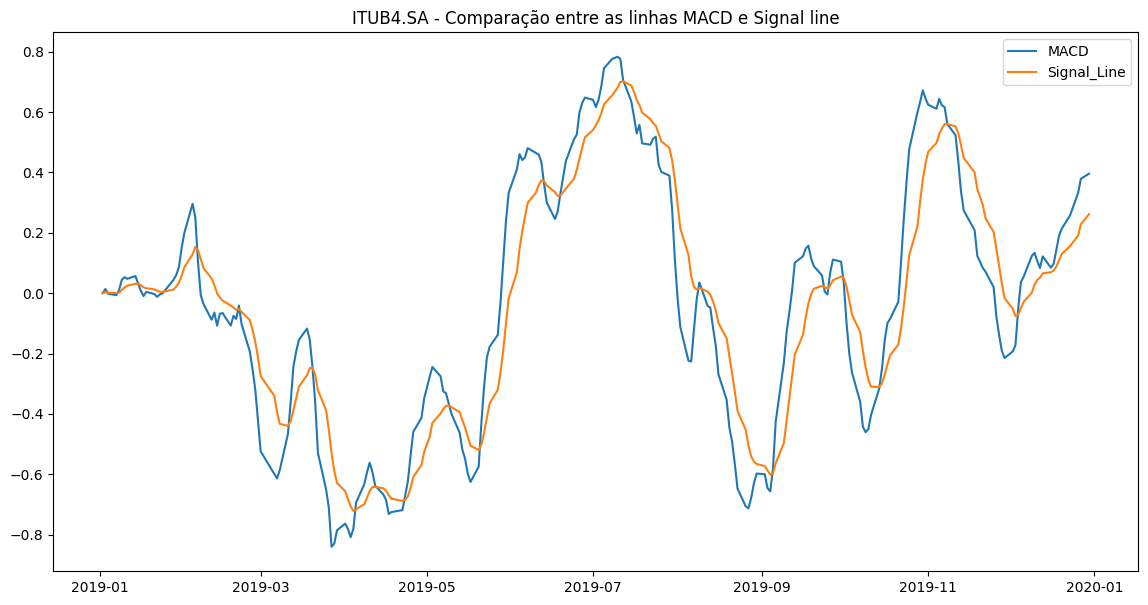

In [ ]:
import matplotlib.pyplot as plt

# Plotando a Média Móvel e o preço de fechamento
plt.figure(figsize=(14,7))
#plt.plot(itau_data['Close'], label='Preço de Fechamento (ITUB4.SA)')
#plt.plot(itau_data['SMA_20'], label='Média Móvel Simples de 20 dias')
#plt.plot(itau_data['EMA_12'], label='Média Móvel Exponencial de 20 dias')
plt.plot(itau_data['MACD'], label='MACD')
plt.plot(itau_data['Signal_Line'], label='Signal_Line')
plt.title('ITUB4.SA - Comparação entre as linhas MACD e Signal line')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#   precisarei pegar as ações um ano e a partir disso eu terei um montante (ex: 100.000);
#   inicia um loop na qual vai verificar o RSI e quando que o valor dele vai ser menor que 30
# quando acontecer isso é gasto todo o montante comprando, é bom descobrir a qtde de acoes tb;
#   tendo comprado tudo agora, teria que ficar olhando o RSI para ver se o valor sobe de 70,
# assim que subir, o certo é vender tudo e esperar um novo valor para comprar
#   Quando der um ano, ativa uma flag para vender tudo, porém pode acontecer de estar em baixa
# no fim do ano, então o ideal é olhar para o RSI para ver quando atingir 70 e caso ainda continua subindo
# deve esperar até que ocorra a quebra e cruze pelo MACD

def calcula_rsi(data, window):
    # Delta = calcula a diferença de preço de um dia para o outro
    delta = data['Close'].diff(1)
    #diff -> calcula a diferença entre valores consecutivos de uma série ou DataFrame

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    #where -> retornando valores quando uma condição é verdadeira e
    # substituindo-os com outro valor quando a condição é falsa

    # Média móvel exponencial dos ganhos e perdas
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calcular o RSI
    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi

def predicao_RSI(data):
    montante = 100000
    qtdAcoes = 0
    momentoCompra = True
    fimDeAno = False

    dataLastBuy = None
    dataLastSell = None
    dataVendaFinal = None

    for i, row in data.iterrows():
        valor_rsi = row['RSI'] if isinstance(row['RSI'], (int, float)) else row['RSI'].iloc[0]

        if i == pd.Timestamp('2020-01-02 00:00:00+00:00'):
                fimDeAno = True

        if fimDeAno:
            if not momentoCompra and (valor_rsi > 75):
                precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
                montante = qtdAcoes * precoVenda
                qtdAcoes = 0
                dataVendaFinal = i
                break;

            elif momentoCompra:
                dataVendaFinal = dataLastSell
                break

        elif momentoCompra and (valor_rsi < 25):
            precoCompra = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            qtdAcoes = montante // precoCompra # o '//' faz a divisão e retorna um número inteiro
            #montante = montante - (qtdAcoes * precoCompra) <- dessa maneira fica mais exato o valor do montante, mas a ideia é zerar o montante
            montante = 0
            momentoCompra = False
            print(f"Comprado {qtdAcoes} ações por R$ {precoCompra} no dia {i}")

        elif not momentoCompra and (valor_rsi > 75):
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            montante = qtdAcoes * precoVenda
            qtdAcoes = 0
            momentoCompra = True
            dataLastSell = i
            print(f"Vendido por R$ {precoVenda} no dia {i}")



    return montante, dataVendaFinal


itau_data = pd.DataFrame()
bb_data = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2022-12-31'

#  ITUB4.SA  BBAS3.SA

tck_itau = ['ITUB4.SA']

itau_data = yf.download(tck_itau, start=start_date, end=end_date)

# Chamando função já existente do RSI, para calcular com a janela de valor 14
itau_data['RSI'] = calcula_rsi(itau_data, 14)

montante, dataVenda = predicao_RSI(itau_data)

print(f"\nValor final R$ {montante}, venda final realiza em {dataVenda}")

[*********************100%***********************]  1 of 1 completed


Comprado 3180.0 ações por R$ 31.440000534057617 no dia 2019-05-16 00:00:00+00:00
Vendido por R$ 35.0 no dia 2019-05-31 00:00:00+00:00
Comprado 3319.0 ações por R$ 33.529998779296875 no dia 2019-08-27 00:00:00+00:00
Vendido por R$ 36.38999938964844 no dia 2019-10-23 00:00:00+00:00

Valor final R$ 120778.40797424316, venda final realiza em 2019-10-23 00:00:00+00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def predicao_MACD(data):
    montante = 100000
    qtdAcoes = 0
    momentoCompra = True
    fimDeAno = False

    dataLastSell = None
    dataVendaFinal = None

    for i, row in data.iterrows():
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
        MACD = row['MACD'] if isinstance(row['MACD'], (int, float)) else row['MACD'].iloc[0]
        Signal_Line = row['Signal_Line'] if isinstance(row['Signal_Line'], (int, float)) else row['Signal_Line'].iloc[0]
        if i == pd.Timestamp('2020-01-02 00:00:00+00:00'):
                fimDeAno = True

        if fimDeAno:
            if not momentoCompra and (MACD < Signal_Line):
                precoVenda = preco_fechamento
                montante = qtdAcoes * precoVenda
                qtdAcoes = 0
                dataVendaFinal = i
                break;

            elif momentoCompra:
                dataVendaFinal = dataLastSell
                break


        elif momentoCompra and (MACD > Signal_Line):
            precoCompra = preco_fechamento
            qtdAcoes = montante // precoCompra
            montante = 0
            momentoCompra = False
            print(f"Comprado {qtdAcoes} ações por R$ {precoCompra} no dia {i}")

        elif not momentoCompra and (MACD < Signal_Line):
            precoVenda = preco_fechamento
            montante = qtdAcoes * precoVenda
            qtdAcoes = 0
            momentoCompra = True
            dataLastSell = i
            print(f"Vendido por R$ {precoVenda} no dia {i}")

    return montante, dataVendaFinal


#19 82 141512.16
#17 83 155072

# 25 82 155103.0
itau_data = pd.DataFrame()
bb_data = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2024-10-21'

#tck_itau = ['BBAS3.SA']
#tck_itau = ['ITUB4.SA']
tck_itau = ['ITUB4.SA']

itau_data = yf.download(tck_itau, start=start_date, end=end_date)

itau_data['EMA_12'] = itau_data['Close'].ewm(span=12, adjust=False).mean()
itau_data['EMA_26'] = itau_data['Close'].ewm(span=26, adjust=False).mean()

itau_data['MACD'] = itau_data['EMA_12'].sub(itau_data['EMA_26'])

itau_data['Signal_Line'] = itau_data['MACD'].ewm(span=26, adjust=False).mean()

montante, dataVenda = predicao_MACD(itau_data)

print(f"\nValor final R$ {montante}, venda final realiza em {dataVenda}")

[*********************100%***********************]  1 of 1 completed


Comprado 2658.0 ações por R$ 37.61000061035156 no dia 2019-01-03 00:00:00+00:00
Vendido por R$ 36.529998779296875 no dia 2019-02-07 00:00:00+00:00
Comprado 2637.0 ações por R$ 36.810001373291016 no dia 2019-03-14 00:00:00+00:00
Vendido por R$ 35.189998626708984 no dia 2019-03-20 00:00:00+00:00
Comprado 2751.0 ações por R$ 33.720001220703125 no dia 2019-04-25 00:00:00+00:00
Vendido por R$ 31.75 no dia 2019-05-14 00:00:00+00:00
Comprado 2601.0 ações por R$ 33.56999969482422 no dia 2019-05-21 00:00:00+00:00
Vendido por R$ 36.400001525878906 no dia 2019-07-19 00:00:00+00:00
Comprado 2627.0 ações por R$ 36.029998779296875 no dia 2019-09-09 00:00:00+00:00
Vendido por R$ 33.279998779296875 no dia 2019-10-02 00:00:00+00:00
Comprado 2507.0 ações por R$ 34.86000061035156 no dia 2019-10-16 00:00:00+00:00
Vendido por R$ 35.68000030517578 no dia 2019-11-14 00:00:00+00:00
Comprado 2447.0 ações por R$ 36.54999923706055 no dia 2019-12-09 00:00:00+00:00
Vendido por R$ 35.59000015258789 no dia 2019-12-1

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calcula_rsi(data, window):
    # delta = calcula a diferença de preço de um dia para o outro
    delta = data['Close'].diff(1)
    # diff -> calcula a diferença entre valores consecutivos de uma série ou DataFrame

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    # where -> retornando valores quando uma condição é verdadeira e
    # substituindo-os com outro valor quando a condição é falsa

    # Média móvel exponencial dos ganhos e perdas
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi


def predicao_RSI_MACD(data):
    montante = 100000
    qtdAcoes = 0
    momentoCompra = True
    fimDeAno = False

    dataLastSell = None
    dataVendaFinal = None

    for i, row in data.iterrows():
        valor_rsi = row['RSI'] if isinstance(row['RSI'], (int, float)) else row['RSI'].iloc[0]
        if i == pd.Timestamp('2020-01-02 00:00:00+00:00'):
                fimDeAno = True

        if fimDeAno:
            MACD = row['MACD'] if isinstance(row['MACD'], (int, float)) else row['MACD'].iloc[0]
            Signal_Line = row['Signal_Line'] if isinstance(row['Signal_Line'], (int, float)) else row['Signal_Line'].iloc[0]
            if not momentoCompra and MACD < Signal_Line:
                precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
                montante = qtdAcoes * precoVenda
                qtdAcoes = 0
                dataVendaFinal = i
                break;

            elif momentoCompra:
                dataVendaFinal = dataLastSell
                break


        elif momentoCompra and (valor_rsi < 25):
            precoCompra = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            qtdAcoes = montante // precoCompra
            montante = 0
            momentoCompra = False
            print(f"Comprado {qtdAcoes} ações por R$ {precoCompra} no dia {i}")

        elif not momentoCompra and (valor_rsi > 80):
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            montante = qtdAcoes * precoVenda
            qtdAcoes = 0
            momentoCompra = True
            dataLastSell = i
            print(f"Vendido por R$ {precoVenda} no dia {i}")



    return montante, dataVendaFinal


itau_data = pd.DataFrame()
bb_data = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2022-12-31'

tck_itau = ['ITUB4.SA']

itau_data = yf.download(tck_itau, start=start_date, end=end_date)

itau_data['RSI'] = calcula_rsi(itau_data, 14)

itau_data['EMA_12'] = itau_data['Close'].ewm(span=12, adjust=False).mean()
itau_data['EMA_26'] = itau_data['Close'].ewm(span=26, adjust=False).mean()

itau_data['MACD'] = itau_data['EMA_12'].sub(itau_data['EMA_26'])

itau_data['Signal_Line'] = itau_data['MACD'].ewm(span=9, adjust=False).mean()

montante, dataVenda = predicao_RSI_MACD(itau_data)

print(f"\nValor final R$ {montante}, venda final realiza em {dataVenda}")

[*********************100%***********************]  1 of 1 completed

Comprado 3180.0 ações por R$ 31.440000534057617 no dia 2019-05-16 00:00:00+00:00
Vendido por R$ 35.08000183105469 no dia 2019-06-03 00:00:00+00:00
Comprado 3327.0 ações por R$ 33.529998779296875 no dia 2019-08-27 00:00:00+00:00
Vendido por R$ 36.79999923706055 no dia 2019-10-25 00:00:00+00:00

Valor final R$ 122433.59746170044, venda final realiza em 2019-10-25 00:00:00+00:00


Fonte sobre o código abaixo
* https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation
* https://www.datacamp.com/tutorial/k-fold-cross-validation
* https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d

# **CÓDIGO COM SVM**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn import linear_model, tree, ensemble
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')


def calcula_rsi(data, window):
    # Delta = calcula a diferença de preço de um dia para o outro
    delta = data['Close'].diff(1)
    #diff -> calcula a diferença entre valores consecutivos de uma série ou DataFrame

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    #where -> retornando valores quando uma condição é verdadeira e
    # substituindo-os com outro valor quando a condição é falsa

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi


def calcula_macd(data, short=12, long=26, signal=9):
    short_ema = data.ewm(span=short, adjust=False).mean()
    long_ema = data.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

#num de folds
k = 5
X = pd.DataFrame()

capital = 100000
capital_history = []

#  ITUB4.SA  BBAS3.SA

data = yf.download('BBAS3.SA', start='2019-01-02', end='2024-11-01')

# X containing the feature data
dados = data[['Open','Close', 'High', 'Low', 'Volume']]

dados['RSI'] = calcula_rsi(dados, 14)
dados['MACD'], dados['Signal_Line'] = calcula_macd(dados['Close'])

# dados['EMA_12'] = dados['Close'].ewm(span=12, adjust=False).mean()
# dados['EMA_26'] = dados['Close'].ewm(span=26, adjust=False).mean()

# dados['MACD'] = dados['EMA_12'].sub(dados['EMA_26'])
# dados['Signal_Line'] = dados['MACD'].ewm(span=9, adjust=False).mean()

dados['Variacao'] = dados['Close'] - dados['Close'].shift(1)
dados['Variacao'] = dados['Variacao'].fillna(0)

# valor 1 indica compra; valor -1 indica venda; valor 0 indica manter
dados['Operacao'] = np.where(dados['Variacao'] >= 0.40, 1, np.where(dados['Variacao'] <= -0.40, -1, 0))


# anos de treinamento: 2019, 2020, 2021, 2022
# anos de simulacao: 2023, 2024

inicio_treinamento = 2019
fim_treinamento = 2022
inicio_simulacao = 2023
fim_simulacao = 2024

# selecionando dados para o treinamento
dados_treinamento = dados[str(inicio_treinamento):str(fim_treinamento)]
X_treino = dados_treinamento[['Open','Close', 'High', 'Low', 'Volume',
                              'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()
Y_treino = dados_treinamento['Operacao'][X_treino.index]

scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)

model = SVC(kernel='linear')
model.fit(X_treino_scaled, Y_treino)


#fit(): Treina o modelo usando os dados de treinamento (X_treino_scaled, Y_treino),
# ajustando o modelo para que ele possa fazer previsões corretas no futuro.

# selecionando dados para o teste
#dados_simulacao = dados.loc[str(simulacao)]
dados_simulacao = dados[str(inicio_simulacao):str(fim_simulacao)]
X_test = dados_simulacao[['Open','Close', 'High', 'Low', 'Volume',
                          'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()

X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
#predict(): Usa o modelo treinado para fazer previsões de compra/venda/manter com
#base nos novos dados de teste (X_test_scaled).

qtdAcoes = 0
momentoCompra = True
fimDeAno = False

dataLastSell = None
dataVendaFinal = None

#for i, row in dados_simulação.iterrows():

for i, row in dados.iterrows():
    if i not in X_test.index:
      #talvez nao precise desse if, se eu trabalhar com o for comentado
        continue

    if i == pd.Timestamp('2024-01-02 00:00:00+00:00'):
          fimDeAno = True

    preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
    # Previsão do modelo: 1 = compra, -1 = venda, 0 = manter posição
    predicao = predictions[X_test.index.get_loc(i)]

    if fimDeAno:
        #MACD = row['MACD'] if isinstance(row['MACD'], (int, float)) else row['MACD'].iloc[0]
        #Signal_Line = row['Signal_Line'] if isinstance(row['Signal_Line'], (int, float)) else row['Signal_Line'].iloc[0]
        if (predicao == -1 and qtdAcoes > 0):
            precoVenda = preco_fechamento
            capital += qtdAcoes * precoVenda
            qtdAcoes = 0
            dataVendaFinal = i
            break;

        elif (predicao == 1 and qtdAcoes == 0) :
            dataVendaFinal = dataLastSell
            break

    else:
        if predicao == 1 and qtdAcoes == 0:
            if capital >= preco_fechamento:
                qtdAcoes += capital // preco_fechamento
                capital %= preco_fechamento
                print(f"Compra: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")

        elif predicao == -1 and qtdAcoes > 0:
            capital += qtdAcoes * preco_fechamento
            print(f"Venda: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")
            qtdAcoes = 0
            dataLastSell = i




print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


 -- pred 461 -- base 4149
Compra: 5785.0 ações a R$ 17.28 no dia 2023-01-05 00:00:00+00:00
Venda: 5785.0 ações a R$ 20.88 no dia 2023-02-22 00:00:00+00:00
Compra: 6241.0 ações a R$ 19.35 no dia 2023-03-06 00:00:00+00:00
Venda: 6241.0 ações a R$ 19.57 no dia 2023-03-09 00:00:00+00:00
Compra: 6114.0 ações a R$ 19.97 no dia 2023-04-11 00:00:00+00:00
Venda: 6114.0 ações a R$ 20.92 no dia 2023-05-02 00:00:00+00:00
Compra: 5915.0 ações a R$ 21.62 no dia 2023-05-05 00:00:00+00:00
Venda: 5915.0 ações a R$ 21.58 no dia 2023-05-16 00:00:00+00:00
Compra: 5796.0 ações a R$ 22.02 no dia 2023-05-19 00:00:00+00:00
Venda: 5796.0 ações a R$ 25.5 no dia 2023-06-22 00:00:00+00:00
Compra: 5867.0 ações a R$ 25.19 no dia 2023-07-03 00:00:00+00:00
Venda: 5867.0 ações a R$ 24.52 no dia 2023-07-10 00:00:00+00:00
Compra: 5970.0 ações a R$ 24.09 no dia 2023-07-31 00:00:00+00:00
Venda: 5970.0 ações a R$ 23.31 no dia 2023-09-21 00:00:00+00:00
Compra: 5841.0 ações a R$ 23.82 no dia 2023-09-28 00:00:00+00:00
Venda: 

#Teste 01)
-> anos de treinamento: 2019, 2020, 2021, 2022

-> anos de simulacao: 2023, 2024 (limite para venda 02/01)

#Teste 02)
-> anos de treinamento: 2018, 2019, 2020, 2021

-> anos de simulacao: 2022, 2023 (limite para venda 02/01)

#Teste 03)
-> anos de treinamento: 2017, 2018, 2019, 2020

-> anos de simulacao: 2021, 2022 (limite para venda 03/01)

#Teste 04)
-> anos de treinamento: 2016, 2017, 2018, 2019

-> anos de simulacao: 2020, 2021 (limite para venda 04/01)

#Teste 05)
-> anos de treinamento: 2015, 2016, 2017, 2018,

-> anos de simulacao: 2019, 2020 (limite para venda 02/01)


# **Código com MLPClassifier com KFOLDS**

In [ ]:
#este código tem como objetivo validar se um outro modelo seria melhor que o SVM
# neste caso vamos testar MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn import linear_model, tree, ensemble
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calcula_rsi(data, window):
    # Delta = calcula a diferença de preço de um dia para o outro
    delta = data['Close'].diff(1)
    #diff -> calcula a diferença entre valores consecutivos de uma série ou DataFrame

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    #where -> retornando valores quando uma condição é verdadeira e
    # substituindo-os com outro valor quando a condição é falsa

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi


def calcula_macd(data, short=12, long=26, signal=9):
    short_ema = data.ewm(span=short, adjust=False).mean()
    long_ema = data.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions):
    count = 0
    capital = 100000
    capital_history = []

    qtdAcoes = 0
    momentoCompra = True
    fimDeAno = False

    dataLastSell = None
    dataVendaFinal = None

    preco_close_pos = None

    for i, row in baseTotal.iterrows():

        if i not in baseX_teste.index:
            continue

        if i == pd.Timestamp('2024-01-02'):
              fimDeAno = True

        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
        # Previsão do modelo: 1 = compra, -1 = venda, 0 = manter posição
        predicao = predictions[baseX_teste.index.get_loc(i)]

        if fimDeAno:
            if (predicao == -1 and qtdAcoes > 0):
                precoVenda = preco_fechamento
                capital += qtdAcoes * precoVenda
                qtdAcoes = 0
                dataVendaFinal = i
                break;

            elif (predicao == 1 and qtdAcoes == 0) :
                dataVendaFinal = dataLastSell
                break

        else:
          # Previsão do modelo: 1 = compra, -1 = venda, 0 = manter posição

          if predicao == 1 and qtdAcoes == 0:
                if capital >= preco_fechamento:
                    qtdAcoes += capital // preco_fechamento
                    capital %= preco_fechamento
                    print(f"Compra: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")

          elif predicao == -1 and qtdAcoes > 0:
                capital += qtdAcoes * preco_fechamento
                print(f"Venda: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")
                qtdAcoes = 0
                dataLastSell = i

    return  capital, dataVendaFinal


#num de folds

X = pd.DataFrame()

capital = 100000
capital_history = []

#  ITUB4.SA  BBAS3.SA

data = yf.download('ITUB4.SA', start='2019-01-02', end='2024-12-01')

data['RSI'] = calcula_rsi(data, 14)
data['MACD'], data['Signal_Line'] = calcula_macd(data['Close'])

data['Variacao'] = data['Close'] - data['Close'].shift(1)
data['Variacao'] = data['Variacao'].fillna(0)
data['Operacao'] = np.where(data['Variacao'] >= 0.40, 1, np.where(data['Variacao'] <= -0.40, -1, 0))
# valor 1 indica compra; valor -1 indica venda; valor 0 indica manter


X = data[['Open', 'Close', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'Signal_Line']].dropna()
y = data['Operacao'][X.index]

# anos de treinamento: 2019, 2020, 2021, 2022
# anos de simulacao: 2023, 2024

# selecionando dados para o treinamento
dados_treinamento = data[str(2019):str(2022)]
X_treino = dados_treinamento[['Open','Close', 'High', 'Low', 'Volume',
                              'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()
Y_treino = dados_treinamento['Operacao'][X_treino.index]

# selecionando dados para o teste
dados_simulacao = data[str(2023):str(2024)]
X_simulacao = dados_simulacao[['Open','Close', 'High', 'Low', 'Volume',
                          'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()

k = 10
kf = KFold(n_splits=k)
scaler = StandardScaler()

melhorModelo = None
melhorAcuracia = 0
mediaAcuracia = 0
mediaPrecisao = 0
mediaF1 = 0


for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]


    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    # Configurando o MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, )
      # hidden_layer_sizes=(100,): Define uma camada oculta com 100 neurônios (você pode ajustar isso conforme necessário).
      # activation='relu': Função de ativação ReLU (padrão).
      # solver='adam': Usado para a otimização (adam é um otimizador baseado em gradiente).
      # max_iter=500: Número máximo de iterações para o treinamento.
    model.fit(X_train_scaled, y_train)
    #fit(): Treina o modelo usando os dados de treinamento (X_treino_scaled, Y_treino), ajustando o modelo para que ele possa fazer previsões corretas no futuro.

    predictions = model.predict(X_test_scaled)

    accuracyAtual = accuracy_score(y_test, predictions)
    # proporção de previsões corretas em relação ao total de exemplos

    precisionAtual = precision_score(y_test, predictions, average='weighted')
    # proporção de exemplos positivos previstos pelo modelo que são realmente positivos

    f1Atual = f1_score(y_test, predictions, average='weighted')
    # a média harmônica entre precisão e recall

    mediaAcuracia += accuracyAtual
    mediaPrecisao += precisionAtual
    mediaF1 += f1Atual

    if accuracyAtual >= melhorAcuracia:
        melhorAcuracia = accuracyAtual
        melhorModelo = model



acuraciaFinal = mediaAcuracia / k
precisaoFinal = mediaPrecisao / k
f1Final = mediaF1 / k

print(f"\nMédia acurácia: {acuraciaFinal:.2f} - Média precisão: {precisaoFinal:.2f} - Média F1: {f1Final:.2f}")

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(data, X_simulacao, prediction)

print(f"Capital final: R$ {capital:.2f}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed



Média acurácia: 0.98 - Média precisão: 0.98 - Média F1: 0.98
Compra: 4032.0 ações a R$ 24.8 no dia 2023-01-05 00:00:00
Venda: 4032.0 ações a R$ 26.1 no dia 2023-01-20 00:00:00
Compra: 3959.0 ações a R$ 26.58 no dia 2023-02-08 00:00:00
Venda: 3959.0 ações a R$ 25.92 no dia 2023-02-09 00:00:00
Compra: 3842.0 ações a R$ 26.71 no dia 2023-02-13 00:00:00
Venda: 3842.0 ações a R$ 26.38 no dia 2023-02-22 00:00:00
Compra: 4093.0 ações a R$ 24.76 no dia 2023-03-06 00:00:00
Venda: 4093.0 ações a R$ 24.66 no dia 2023-03-09 00:00:00
Compra: 4227.0 ações a R$ 23.88 no dia 2023-03-21 00:00:00
Venda: 4227.0 ações a R$ 23.15 no dia 2023-03-23 00:00:00
Compra: 3975.0 ações a R$ 24.62 no dia 2023-03-30 00:00:00
Venda: 3975.0 ações a R$ 24.03 no dia 2023-04-03 00:00:00
Compra: 3897.0 ações a R$ 24.51 no dia 2023-04-04 00:00:00
Venda: 3897.0 ações a R$ 24.9 no dia 2023-05-02 00:00:00
Compra: 3733.0 ações a R$ 25.99 no dia 2023-05-05 00:00:00
Venda: 3733.0 ações a R$ 26.36 no dia 2023-05-22 00:00:00
Compr

# **Código com SVM utilizando KFOLDS**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np
import pandas as pd
import yfinance as yf

def calcula_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(data, short=12, long=26, signal=9):
    short_ema = data.ewm(span=short, adjust=False).mean()
    long_ema = data.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions):
    count = 0
    capital = 100000
    capital_history = []

    qtdAcoes = 0
    momentoCompra = True
    fimDeAno = False

    dataLastSell = None
    dataVendaFinal = None

    preco_close_pos = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        if i == pd.Timestamp('2024-01-02'):
              fimDeAno = True

        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
        # Previsão do modelo: 1 = compra, -1 = venda, 0 = manter posição
        predicao = predictions[baseX_teste.index.get_loc(i)]

        if fimDeAno:
            if (predicao == -1 and qtdAcoes > 0):
                precoVenda = preco_fechamento
                capital += qtdAcoes * precoVenda
                qtdAcoes = 0
                dataVendaFinal = i
                break;

            elif (predicao == 1 and qtdAcoes == 0) :
                dataVendaFinal = dataLastSell
                break

        else:
          if predicao == 1 and qtdAcoes == 0:
                if capital >= preco_fechamento:
                    qtdAcoes += capital // preco_fechamento
                    capital %= preco_fechamento
                    print(f"Compra: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")

          elif predicao == -1 and qtdAcoes > 0:
                capital += qtdAcoes * preco_fechamento
                print(f"Venda: {qtdAcoes} ações a R$ {round(preco_fechamento, 2)} no dia {i}")
                qtdAcoes = 0
                dataLastSell = i

    return  capital, dataVendaFinal



#2017, 2018, 2019, 2020
#2021, 2022, 2023, 2024

#  ITUB4.SA  BBAS3.SA
data = yf.download('ITUB4.SA', start='2019-01-02', end='2024-11-01')

data['RSI'] = calcula_rsi(data, 14)
data['MACD'], data['Signal_Line'] = calcula_macd(data['Close'])

data['Variacao'] = data['Close'] - data['Close'].shift(1)
data['Variacao'] = data['Variacao'].fillna(0)
data['Operacao'] = np.where(data['Variacao'] >= 0.40, 1, np.where(data['Variacao'] <= -0.40, -1, 0))

X = data[['Open', 'Close', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'Signal_Line']].dropna()
y = data['Operacao'][X.index]

# selecionando dados para o treinamento
dados_treinamento = data[str(2019):str(2022)]
X_treino = dados_treinamento[['Open','Close', 'High', 'Low', 'Volume',
                              'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()
Y_treino = dados_treinamento['Operacao'][X_treino.index]

# selecionando dados para o teste
dados_simulacao = data[str(2023):str(2024)]
X_simulacao = dados_simulacao[['Open','Close', 'High', 'Low', 'Volume',
                          'RSI', 'MACD', 'Signal_Line', 'Variacao']].dropna()

k = 10
kf = KFold(n_splits=k)

scaler = StandardScaler()

accuracy_scores = []

melhorModelo = None
melhorAcuracia = 0
mediaAcuracia = 0
mediaPrecisao = 0
mediaF1 = 0

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    model = SVC(kernel='linear')
    #SVC(
    # C = 1.0 - O termo C controla a troca entre a maximização da margem e a minimização do erro de classificação. Valores maiores de C implicam menos regularização, ou seja, o modelo se ajusta mais aos dados de treinamento. Valores menores de C incentivam uma margem maior, permitindo mais erros no treinamento.
    # kernal = 'linear' - 'linear': usa um kernel linear (uma linha separando os dados). 'poly': usa um kernel polinomial. 'rbf': usa um kernel radial basis function (RBF). 'sigmoid': usa um kernel sigmoidal.
    # degree = 3 - Apenas usado se o kernel for 'poly'. Especifica o grau do polinômio usado no kernel polinomia.
    # gamma = 'scale' - Parâmetro usado nos kernels 'rbf', 'poly' e 'sigmoid'. Controla a influência de cada ponto de dados. Pode ser um valor: 'scale': usa 1 / (n_features * X.var()) como valor padrão. Ou 'auto': usa 1 / n_features.
    # probability = False - Se verdadeiro, permite que o modelo calcule probabilidades usando uma técnica de validação cruzada após o ajuste. Essa operação é mais lenta, então o padrão é False.
    # shrinking = True - Usa o heurístico de redução (shrinkage heuristic), que pode aumentar a velocidade de treinamento para grandes conjuntos de dados. O padrão é ativado.
    #)

    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracyAtual = accuracy_score(y_test, predictions)
    # proporção de previsões corretas em relação ao total de exemplos

    precisionAtual = precision_score(y_test, predictions, average='weighted')
    # proporção de exemplos positivos previstos pelo modelo que são realmente positivos

    f1Atual = f1_score(y_test, predictions, average='weighted')
    # a média harmônica entre precisão e recall

    mediaAcuracia += accuracyAtual
    mediaPrecisao += precisionAtual
    mediaF1 += f1Atual

    if accuracyAtual >= melhorAcuracia:
        melhorAcuracia = accuracyAtual
        melhorModelo = model
    accuracy_scores.append(accuracyAtual)


acuraciaFinal = mediaAcuracia / k
precisaoFinal = mediaPrecisao / k
f1Final = mediaF1 / k

print(f"\nMédia acurácia: {acuraciaFinal:.2f} - Média precisão: {precisaoFinal:.2f} - Média F1: {f1Final:.2f}")

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(data, X_simulacao, prediction)

print(f"Capital final: R$ {capital:.2f}; Data da última transação: {dataVendaFinal}")



[*********************100%***********************]  1 of 1 completed



Média acurácia: 0.98 - Média precisão: 0.98 - Média F1: 0.98
Compra: 4032.0 ações a R$ 24.8 no dia 2023-01-05 00:00:00
Venda: 4032.0 ações a R$ 26.1 no dia 2023-01-20 00:00:00
Compra: 3959.0 ações a R$ 26.58 no dia 2023-02-08 00:00:00
Venda: 3959.0 ações a R$ 25.92 no dia 2023-02-09 00:00:00
Compra: 3842.0 ações a R$ 26.71 no dia 2023-02-13 00:00:00
Venda: 3842.0 ações a R$ 26.38 no dia 2023-02-22 00:00:00
Compra: 4093.0 ações a R$ 24.76 no dia 2023-03-06 00:00:00
Venda: 4093.0 ações a R$ 24.66 no dia 2023-03-09 00:00:00
Compra: 4227.0 ações a R$ 23.88 no dia 2023-03-21 00:00:00
Venda: 4227.0 ações a R$ 23.15 no dia 2023-03-23 00:00:00
Compra: 3975.0 ações a R$ 24.62 no dia 2023-03-30 00:00:00
Venda: 3975.0 ações a R$ 24.03 no dia 2023-04-03 00:00:00
Compra: 3897.0 ações a R$ 24.51 no dia 2023-04-04 00:00:00
Venda: 3897.0 ações a R$ 24.9 no dia 2023-05-02 00:00:00
Compra: 3733.0 ações a R$ 25.99 no dia 2023-05-05 00:00:00
Venda: 3733.0 ações a R$ 26.36 no dia 2023-05-22 00:00:00
Compr